# Importing the Libraries

In [1]:
import pandas as pd
import requests
import json
import re
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1) Gathering Data

In [2]:
archive= pd.read_csv('twitter-archive-enhanced.csv')

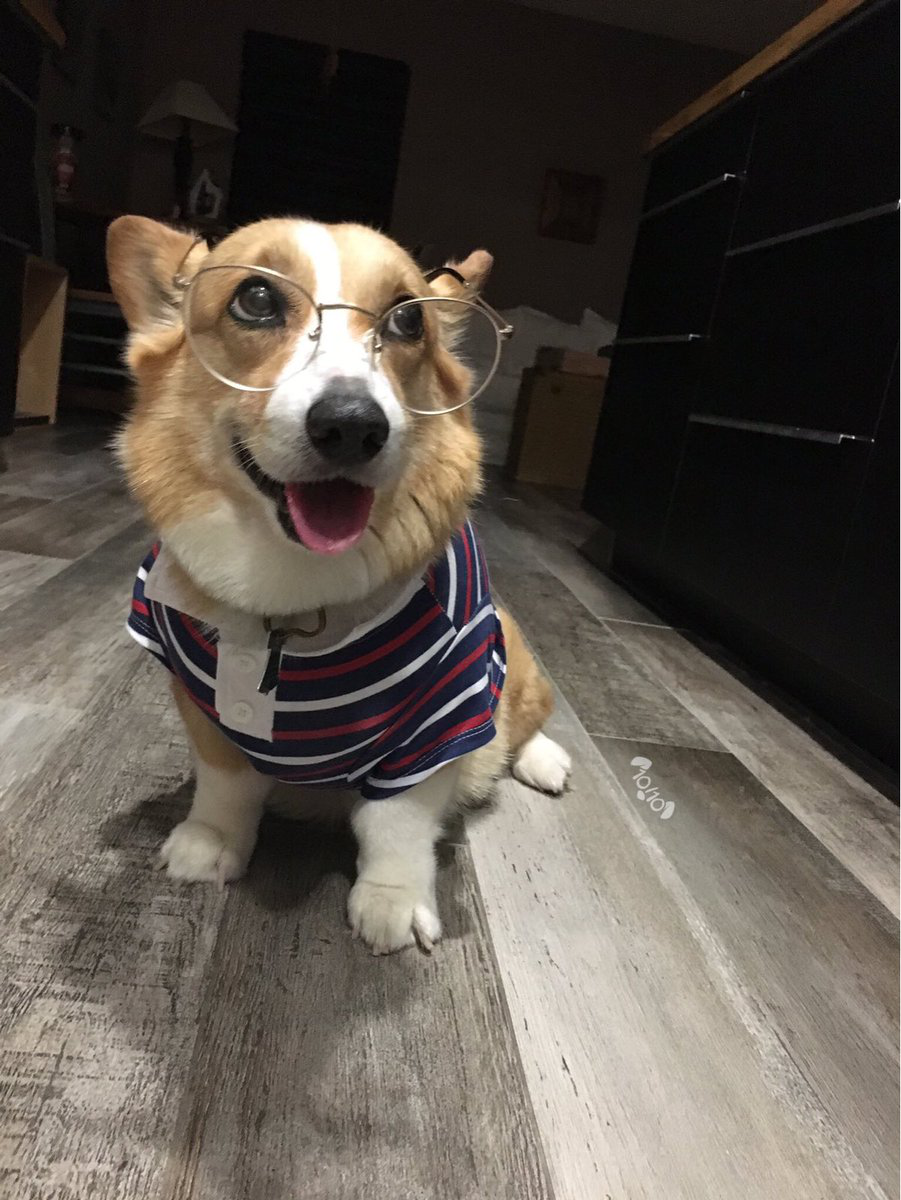

In [3]:
imag='https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg'

response = requests.get(imag)
img = Image.open(BytesIO(response.content))
img

In [4]:
imag

'https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg'

### Requesting the second dataset from the url:

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

Creating a new file and writing the dataset in it.

In [6]:
with open ('image-predictions.tsv', mode= 'wb') as file:
    file.write(response.content)

Reading the second dataset by using pandas library

In [7]:
image_predictions= pd.read_csv("image-predictions.tsv", sep='\t')

## Reading the third dataset and load it as json:
I loaded this dataset as a json in the variable, because I don't need all of the tweet-json dataset variables -columns- in this analysis, and chose the next columns:

id : this is the primary key to make some relationship with other datasets in this analysis.

favorites: total of the preferences of the specific tweet.

retweets: total of the retweets for the specific tweet.

To read this dataset by used open built in, and I chose the important columns for this analysis.

Then I get the specific columns, and save the data in a new list

In [8]:
summery_list=[]
for cursor in open ("tweet-json.txt", "r"):
    record=json.loads(cursor)
    summery_list.append({'id': record['id'],
                 'favorites': record['favorite_count'],
                 'retweets': record['retweet_count']})
# Source: https://stackoverflow.com/questions/16451033/trying-to-parse-twitter-json-from-a-text-file

- converting the list to data famre to completting this analysis.

In [9]:
tweet_summary= pd.DataFrame(summery_list, columns=['id','favorites','retweets'])
tweet_summary.shape

(2354, 3)

Save tweet_summary into csv file

In [10]:
tweet_summary.to_csv("tweet_summary.csv")

In [11]:
#del(tweet_summary); del(summery_list)

# 2) Assess

## I assessed data by two ways: 
#### -	Visually: 
By using Microsoft Excel. 
#### -	Programmatically: 
By using Python libraries and functions like pandas, numpy, and function( info(), sample(), .value_counts()….etc) Quality: 


# Quality
### Archive table:

- data type of 'timestamp', and 'retweeted_status_timestamp' column is object -string- he must be change to datetime.
- 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',  and 'expanded_urls' these columns has a null values.
- 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', float and it must be string.
- There are some duplicates in a column 'expanded_urls', and he is not important column.
- all the 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' must be dropping because it is not necessary in my analysis.
- 'source' column must be transformed from HTML format to the simple string.
- timestamp must be split to date and time.
- 'expanded_urls' has a null value I will drop all rows that hava null value.
- splitting the uncorrected data from the dogs_stage like doggopupper, doggofloofer, and doggopuppo by comma.

### image_predictions:
- 281 records are missing.
- some values have '_' instead of space.



### tweet_summary:
- 2 recordes are missing.

# Tidiness
### Archive table:

- 'doggo', 'floofer', 'pupper', and 'puppo' unnecessary I think I Can merge in one column.
- merging the three datasets into one dataset and deleting unnecessary columns.






Calculating the null values in each dataset

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [14]:
archive.describe(include='all')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count   2.356000e+03           7.800000e+01         7.800000e+01   
unique           NaN                    NaN                  NaN   
top              NaN                    NaN                  NaN   
freq             NaN                    NaN                  NaN   
mean    7.427716e+17           7.455079e+17         2.014171e+16   
std     6.856705e+16           7.582492e+16         1.252797e+17   
min     6.660209e+17           6.658147e+17         1.185634e+07   
25%     6.783989e+17           6.757419e+17         3.086374e+08   
50%     7.196279e+17           7.038708e+17         4.196984e+09   
75%     7.993373e+17           8.257804e+17         4.196984e+09   
max     8.924206e+17           8.862664e+17         8.405479e+17   

                        timestamp  \
count                        2356   
unique                       2356   
top     2015-12-18 18:29:07 +0000   
freq                            1   
mean                          NaN   
std                           NaN   
min                           NaN   
25%                           NaN   
50%                           NaN   
75%                           NaN   
max                           NaN   

                                                   source  \
count                                                2356   
unique                                                  4   
top     <a href="http://twitter.com/download/iphone" r...   
freq                                                 2221   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     text  \
count                                                2356   
unique                                               2356   
top     This is Pawnd... James Pawnd. He's suave af. 1...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

        retweeted_status_id  retweeted_status_user_id  \
count          1.810000e+02              1.810000e+02   
unique                  NaN                       NaN   
top                     NaN                       NaN   
freq                    NaN                       NaN   
mean           7.720400e+17              1.241698e+16   
std            6.236928e+16              9.599254e+16   
min            6.661041e+17              7.832140e+05   
25%            7.186315e+17              4.196984e+09   
50%            7.804657e+17              4.196984e+09   
75%            8.203146e+17              4.196984e+09   
max            8.874740e+17              7.874618e+17   

       retweeted_status_timestamp  \
count                         181   
unique                        181   
top     2017-03-08 18:52:12 +0000   
freq                            1   
mean                          NaN   
std                           NaN   
min                           NaN   
25%                           NaN   
50%                           NaN   
75%                           NaN   
max                           NaN   

                                            expanded_urls  rating_numerator  \
count                                                2297       2356.000000

In [15]:
tweet_summary.head()

id  favorites  retweets
0  892420643555336193      39467      8853
1  892177421306343426      33819      6514
2  891815181378084864      25461      4328
3  891689557279858688      42908      8964
4  891327558926688256      41048      9774

In [16]:
tweet_summary.describe(include='all')

id      favorites      retweets
count  2.354000e+03    2354.000000   2354.000000
mean   7.426978e+17    8080.968564   3164.797366
std    6.852812e+16   11814.771334   5284.770364
min    6.660209e+17       0.000000      0.000000
25%    6.783975e+17    1415.000000    624.500000
50%    7.194596e+17    3603.500000   1473.500000
75%    7.993058e+17   10122.250000   3652.000000
max    8.924206e+17  132810.000000  79515.000000

In [17]:
tweet_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id           2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [19]:
image_predictions.describe(include='all')

tweet_id                                          jpg_url  \
count   2.075000e+03                                             2075   
unique           NaN                                             2009   
top              NaN  https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg   
freq             NaN                                                2   
mean    7.384514e+17                                              NaN   
std     6.785203e+16                                              NaN   
min     6.660209e+17                                              NaN   
25%     6.764835e+17                                              NaN   
50%     7.119988e+17                                              NaN   
75%     7.932034e+17                                              NaN   
max     8.924206e+17                                              NaN   

            img_num                p1      p1_conf p1_dog                  p2  \
count   2075.000000              2075  2075.000000   2075                2075   
unique          NaN               378          NaN      2                 405   
top             NaN  golden_retriever          NaN   True  Labrador_retriever   
freq            NaN               150          NaN   1532                 104   
mean       1.203855               NaN     0.594548    NaN                 NaN   
std        0.561875               NaN     0.271174    NaN                 NaN   
min        1.000000               NaN     0.044333    NaN                 NaN   
25%        1.000000               NaN     0.364412    NaN                 NaN   
50%        1.000000               NaN     0.588230    NaN                 NaN   
75%        1.000000               NaN     0.843855    NaN                 NaN   
max        4.000000               NaN     1.000000    NaN                 NaN   

             p2_conf p2_dog                  p3       p3_conf p3_dog  
count   2.075000e+03   2075                2075  2.075000e+03   2075  
unique           NaN      2                 408           NaN      2  
top              NaN   True  Labrador_retriever           NaN   True  
freq             NaN   1553                  79           NaN   1499  
mean    1.345886e-01    NaN                 NaN  6.032417e-02    NaN  
std     1.006657e-01    NaN                 NaN  5.090593e-02    NaN  
min     1.011300e-08    NaN                 NaN  1.740170e-10    NaN  
25%     5.388625e-02    NaN                 NaN  1.622240e-02    NaN  
50%     1.181810e-01    NaN                 NaN  4.944380e-02    NaN  
75%     1.955655e-01    NaN                 NaN  9.180755e-02    NaN  
max     4.880140e-01    NaN                 NaN  2.734190e-01    NaN

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
tweet_summary.isna().sum()

id           0
favorites    0
retweets     0
dtype: int64

In [24]:
# duplicated values in expanded_urls column.
archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1                                                                                                                                                                              2
https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1                                                                                                                                                                              2
https://twitter.com/dog_rates/status/692417313023332352/photo/1                            

## How many duplicated rows in each dataset?

In [25]:
archive['is_duplicated']=archive.duplicated()
archive['is_duplicated'].value_counts()

False    2356
Name: is_duplicated, dtype: int64

In [26]:
sum(archive.duplicated())

0

there are no duplicated rows in archive dataset

In [27]:
image_predictions['is_duplicated']= image_predictions.duplicated()
image_predictions['is_duplicated'].value_counts()

False    2075
Name: is_duplicated, dtype: int64

In [28]:
sum(image_predictions.duplicated())

0

#### There are some diplicated in jpg_url

In [29]:
sum(image_predictions.jpg_url.duplicated())

66

there are no duplicated rows in image_predictions dataset

In [30]:
tweet_summary['is_duplicated']=tweet_summary.duplicated()
tweet_summary['is_duplicated'].value_counts()

False    2354
Name: is_duplicated, dtype: int64

In [31]:
sum(tweet_summary.duplicated())

0

# 3) Cleaning Data

### Make Copy for dataframe

In [32]:
archive_clean= archive.copy()
image_predictions_clean= image_predictions.copy()
tweet_summary_clean= tweet_summary.copy()

# twitter-archive-enhanced.csv

### Difne
- transforming 'source' column from HTML format to the simple string and extract the tag content.
- data type of 'timestamp' column is object -string- he must be change to datetime.
- 'in_reply_to_status_id' and 'in_reply_to_user_id' must be converted from float to string.

-Because the following columns have NaN value:
- dropping the following columns because I don't need to them in my analysis, and it has a null values -missing values- 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', and 'expanded_urls'.
- timestamp must be split to date and time.
- dropping timestamp.
- There are some duplicates in a column 'expanded_urls', and he is not important column.
- 'expanded_urls' has a null value I will drop all rows that hava null value.
- splitting the uncorrected data from the dogs_stage like doggopupper, doggofloofer, and doggopuppo by comma.

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
is_duplicated                 23

### Code

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
is_duplicated                 23

'expanded_urls' has a null value I will replace it with the most frequence url.

In [35]:
# archive_clean.dropna(axis=0, subset=['expanded_urls'], inplace=True)
archive_clean.expanded_urls.fillna(archive_clean.expanded_urls.value_counts().idxmax(), inplace=True)

 There are some duplicates in a column 'expanded_urls', and he is not important column.

In [36]:
li=[]
li=archive_clean['expanded_urls'].values.tolist()
len(li)

2356

In [37]:
count=0
url_c=[]
while count < archive_clean['expanded_urls'].shape[0]:
    url_c.append(li[count][0])
    count=count+1

In [38]:
archive_clean= archive_clean.drop('expanded_urls', 1)

In [39]:
archive_clean['expanded_urls']=url_c

'in_reply_to_status_id' and 'in_reply_to_user_id' must be converted from float to string.

In [40]:
archive_clean['in_reply_to_status_id']=archive_clean['in_reply_to_status_id'].fillna(0)
archive_clean['in_reply_to_status_id']=archive_clean['in_reply_to_status_id'].astype('object')

In [41]:
archive_clean['in_reply_to_user_id']=archive_clean['in_reply_to_status_id'].fillna(0)
archive_clean['in_reply_to_user_id']=archive_clean['in_reply_to_status_id'].astype('object')

### transforming 'source' column from HTML format to the simple string.
source : https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas

In [42]:
archive_clean.source.fillna('0', inplace=True)

In [43]:
archive_clean.source[25:31]

25    <a href="http://twitter.com/download/iphone" r...
26    <a href="http://twitter.com/download/iphone" r...
27    <a href="http://twitter.com/download/iphone" r...
28    <a href="http://twitter.com/download/iphone" r...
29    <a href="http://twitter.com/download/iphone" r...
30    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [44]:

def remove_html_tag(st):
    ## this function for extract the content from HTML tag
    ## input:
    ##       st : HTML tags as one string
    ## output:
    ##       content from the tag
    return re.sub('<[^<]+?>', '', st)


In [45]:
i=0
return_source=[]
while i < archive_clean['source'].shape[0] :
    st2= remove_html_tag(archive_clean['source'][i])
    return_source.append(st2)
    i=i+1


drop the source column 

In [46]:
archive_clean=archive_clean.drop('source',1)

create a new source column 

In [47]:
archive_clean['source']= pd.DataFrame(return_source)

data type of 'timestamp' column is object -string- he must be change to datetime.

In [48]:
archive_clean['timestamp']=pd.to_datetime(archive_clean.timestamp)

Split date and time

In [49]:
archive_clean['date'] = pd.to_datetime(archive_clean['timestamp']).dt.date
archive_clean['time'] = pd.to_datetime(archive_clean['timestamp']).dt.time

dropping timstamp from dataframe

In [50]:
archive_clean.drop('timestamp', axis=1, inplace=True)

### Merge the 4 columns in to a new column called dogs_stage

merge the doggo, floofer, pupper, and puppo columns in one column called dogs_class

In [51]:
archive_clean['doggo'].replace('None', '_', inplace=True)
archive_clean['floofer'].replace('None', '_', inplace=True)
archive_clean['pupper'].replace('None', '_', inplace=True)
archive_clean['puppo'].replace('None', '_', inplace=True)
archive_clean['dogs_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean['dogs_stage']=archive_clean['dogs_stage'].str.replace('_','')
archive_clean['dogs_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dogs_stage, dtype: int64

dropping the following columns.

In [52]:
archive_clean.drop('pupper', axis=1, inplace=True)
archive_clean.drop('doggo', axis=1, inplace=True)
archive_clean.drop('puppo', axis=1, inplace=True)
archive_clean.drop('floofer', axis=1, inplace=True)

dropping the following columns because I don't need to them in my analysis, and it has a null values 
-missing values- 'in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
'retweeted_status_timestamp', and 'expanded_urls'.

In [53]:
archive_clean.drop(['retweeted_status_id'], axis=1, inplace = True)
archive_clean.drop(['in_reply_to_user_id'], axis=1, inplace = True)
archive_clean.drop(['in_reply_to_status_id'], axis=1, inplace = True)
archive_clean.drop(['retweeted_status_user_id'], axis=1, inplace = True)
archive_clean.drop(['retweeted_status_timestamp'], axis=1, inplace = True)
archive_clean.drop(['expanded_urls'], axis=1, inplace = True)

In [54]:
archive_clean.dogs_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dogs_stage, dtype: int64

splitting the uncorrected data from the dogs_stage like doggopupper, doggofloofer, and doggopuppo by comma.

In [55]:
archive_clean['dogs_stage']=archive_clean['dogs_stage'].replace('doggopupper','doggo, pupper')
archive_clean['dogs_stage']=archive_clean['dogs_stage'].replace('doggofloofer','doggo, floofer')
archive_clean['dogs_stage']=archive_clean['dogs_stage'].replace('doggopuppo','doggo, puppo')

### test

test to show are the contents extract from HTML tags?

In [56]:

archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

test to show are the date & time columns converted from string to datetmie

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
is_duplicated         2356 non-null bool
source                2356 non-null object
date                  2356 non-null object
time                  2356 non-null object
dogs_stage            2356 non-null object
dtypes: bool(1), int64(3), object(6)
memory usage: 168.0+ KB


test about archive_clean['Dates'] archive_clean['Time'] to see the new columns

In [58]:
archive_clean[['date','time']].head()

date      time
0  2017-08-01  16:23:56
1  2017-08-01  00:17:27
2  2017-07-31  00:18:03
3  2017-07-30  15:58:51
4  2017-07-29  16:00:24

In [59]:
# test for dogs_class column
archive_clean['dogs_stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dogs_stage, dtype: int64

# image-predictions.tsv

### Difne

- replace _ with space in p1,p2,p3 columns
- rename the following columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and	p3_dog.

### Code

In [60]:
# replace _ with space in p1,p2,p3 columns
image_predictions_clean['p1']= image_predictions_clean['p1'].str.replace('_',' ')
image_predictions_clean['p2']= image_predictions_clean['p2'].str.replace('_',' ')
image_predictions_clean['p3']= image_predictions_clean['p3'].str.replace('_',' ')

In [61]:
# rename the following columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog.
image_predictions_clean.rename(columns={'p1': 'first_predict', 'p1_conf': 'first_predict_confidence',
                                        'p1_dog':'first_predict_is_dog', 'p2': 'second_predict', 
                                        'p2_conf': 'second_predict_confidence',
                                       'p2_dog':'second_predict_is_dog',
                                       'p3': 'third_predict', 'p3_conf': 'third_predict_confidence',
                                       'p3_dog':'third_predict_is_dog'}, inplace=True)

### Test

In [62]:
# test for '_' and space
image_predictions_clean['first_predict'].sample(5)

1874        Dandie Dinmont
1783                 boxer
1742               Samoyed
1652    Labrador retriever
278                redbone
Name: first_predict, dtype: object

In [63]:
# test for '_' and space
image_predictions_clean['second_predict'].sample(5)

1728                kuvasz
763                   pier
2043              Shih-Tzu
1777    Labrador retriever
1896                kelpie
Name: second_predict, dtype: object

In [64]:
# test for '_' and space
image_predictions_clean['third_predict'].sample(5)

18           bookcase
1876       white wolf
1973        Chihuahua
1129          sandbar
760     toilet tissue
Name: third_predict, dtype: object

In [65]:
# testing: print the column's name 
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_predict',
       'first_predict_confidence', 'first_predict_is_dog', 'second_predict',
       'second_predict_confidence', 'second_predict_is_dog', 'third_predict',
       'third_predict_confidence', 'third_predict_is_dog', 'is_duplicated'],
      dtype='object')

In [66]:
archive_clean.tweet_id.head(1)

0    892420643555336193
Name: tweet_id, dtype: int64

In [67]:
image_predictions_clean.tweet_id.head(1)

0    666020888022790149
Name: tweet_id, dtype: int64

In [68]:
tweet_summary_clean.head(1)

id  favorites  retweets  is_duplicated
0  892420643555336193      39467      8853          False

In [69]:
tweet_summary_clean.rename(columns={"id":"tweet_id"}, inplace=True)

# Create Master dataframe:


In [70]:
print('Loading....')
master_dataframe= pd.merge(archive_clean, image_predictions_clean, on='tweet_id', how='inner')
master_dataframe= pd.merge(master_dataframe, tweet_summary_clean, on='tweet_id', how='inner')
master_dataframe.to_csv('master_archive.csv')
print('Done.')

Loading....
Done.


In [71]:
master= pd.read_csv('master_archive.csv', index_col=0)

In [72]:
master.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'is_duplicated_x', 'source', 'date', 'time', 'dogs_stage', 'jpg_url',
       'img_num', 'first_predict', 'first_predict_confidence',
       'first_predict_is_dog', 'second_predict', 'second_predict_confidence',
       'second_predict_is_dog', 'third_predict', 'third_predict_confidence',
       'third_predict_is_dog', 'is_duplicated_y', 'favorites', 'retweets',
       'is_duplicated'],
      dtype='object')

#### Deleting unnecessary columns

In [73]:
columns_list=['is_duplicated_x','is_duplicated_y','is_duplicated']
master.drop(columns_list, inplace= True, axis=1)

In [74]:
master.shape

(2073, 22)

In [75]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                     2073 non-null int64
text                         2073 non-null object
rating_numerator             2073 non-null int64
rating_denominator           2073 non-null int64
name                         2073 non-null object
source                       2073 non-null object
date                         2073 non-null object
time                         2073 non-null object
dogs_stage                   320 non-null object
jpg_url                      2073 non-null object
img_num                      2073 non-null int64
first_predict                2073 non-null object
first_predict_confidence     2073 non-null float64
first_predict_is_dog         2073 non-null bool
second_predict               2073 non-null object
second_predict_confidence    2073 non-null float64
second_predict_is_dog        2073 non-null bool
third_predict                2073 non-null object


In [76]:
master.dogs_stage.fillna('Not found', inplace=True)

In [77]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id                     2073 non-null int64
text                         2073 non-null object
rating_numerator             2073 non-null int64
rating_denominator           2073 non-null int64
name                         2073 non-null object
source                       2073 non-null object
date                         2073 non-null object
time                         2073 non-null object
dogs_stage                   2073 non-null object
jpg_url                      2073 non-null object
img_num                      2073 non-null int64
first_predict                2073 non-null object
first_predict_confidence     2073 non-null float64
first_predict_is_dog         2073 non-null bool
second_predict               2073 non-null object
second_predict_confidence    2073 non-null float64
second_predict_is_dog        2073 non-null bool
third_predict                2073 non-null object

# Data Visualisation

### Describing the relationship between retweeting and favoriting for all images in the dataset.

In [78]:
master.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'source', 'date', 'time', 'dogs_stage', 'jpg_url', 'img_num',
       'first_predict', 'first_predict_confidence', 'first_predict_is_dog',
       'second_predict', 'second_predict_confidence', 'second_predict_is_dog',
       'third_predict', 'third_predict_confidence', 'third_predict_is_dog',
       'favorites', 'retweets'],
      dtype='object')

## Are there relationships between retweeting and favoriting for all images?

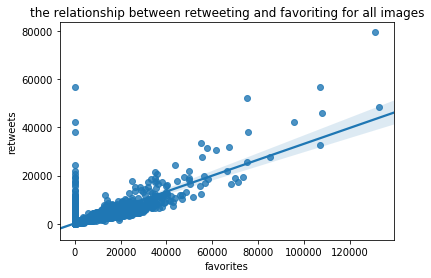

In [79]:
sns.regplot(master['favorites'], master['retweets'])
plt.xlabel('favorites')
plt.ylabel('retweets')
plt.title('the relationship between retweeting and favoriting for all images')
plt.show()

In [80]:
master['favorites'].corr(master['retweets'])

0.7904760788445079

From the scatter plot in above, I notice there are positive relationships between retweeting and favoriting for all images, "A positive correlation indicates the extent to which those variables increase or decrease in parallel*"
The correlation is equal to 0.790, and this is mean the relationship is strong.


* source:
https://whatis.techtarget.com/definition/correlation


## Compare between all prediction process in the data set, and which prediction experiment are scored the most correct classify of the images?

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'value')

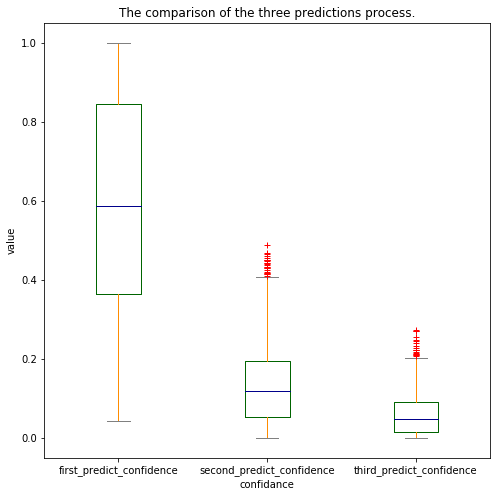

In [81]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}

ax=master.plot(y=['first_predict_confidence','second_predict_confidence','third_predict_confidence'], 
            kind='box', figsize=(8,8), title='The comparison of the three predictions process.', 
            color= color, sym='r+');
ax.set_xlabel("confidance")
ax.set_ylabel("value")
# source:
## https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

The chart in above I notice the first experiment of predictions are scored a the most correct classify of images, and I think the module of classifying is good and the fit.

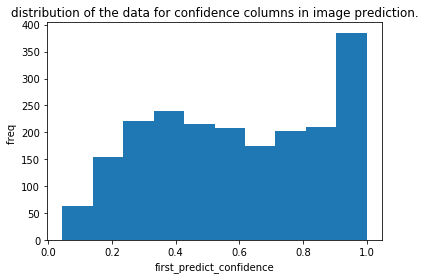

In [82]:
plt.hist(master['first_predict_confidence']);
plt.title('distribution of the data for confidence columns in image prediction.');
plt.xlabel('first_predict_confidence');
plt.ylabel('freq ');


In [83]:
print('mode',master['first_predict_confidence'].mode()[0])
print('mean',master['first_predict_confidence'].mean())
print('median',master['first_predict_confidence'].median())

mode 0.0903414
mean 0.5945316507477092
median 0.58823


### Insight 1:
### Top 5 dogs Images favorites

In [84]:
li=[]
for _ in range(1,master.shape[0]):
    li.append(master.favorites[_])
li.sort(reverse=True)

In [85]:

def print_image(x):
    response = requests.get(x)
    img = Image.open(BytesIO(response.content))
    return img
    

In [86]:
url=[]

for i in li:
    url.append((master[master['favorites']==i]['jpg_url']).to_string(index=False))
# deletting uncorrect urls & text
del(url[1:4])


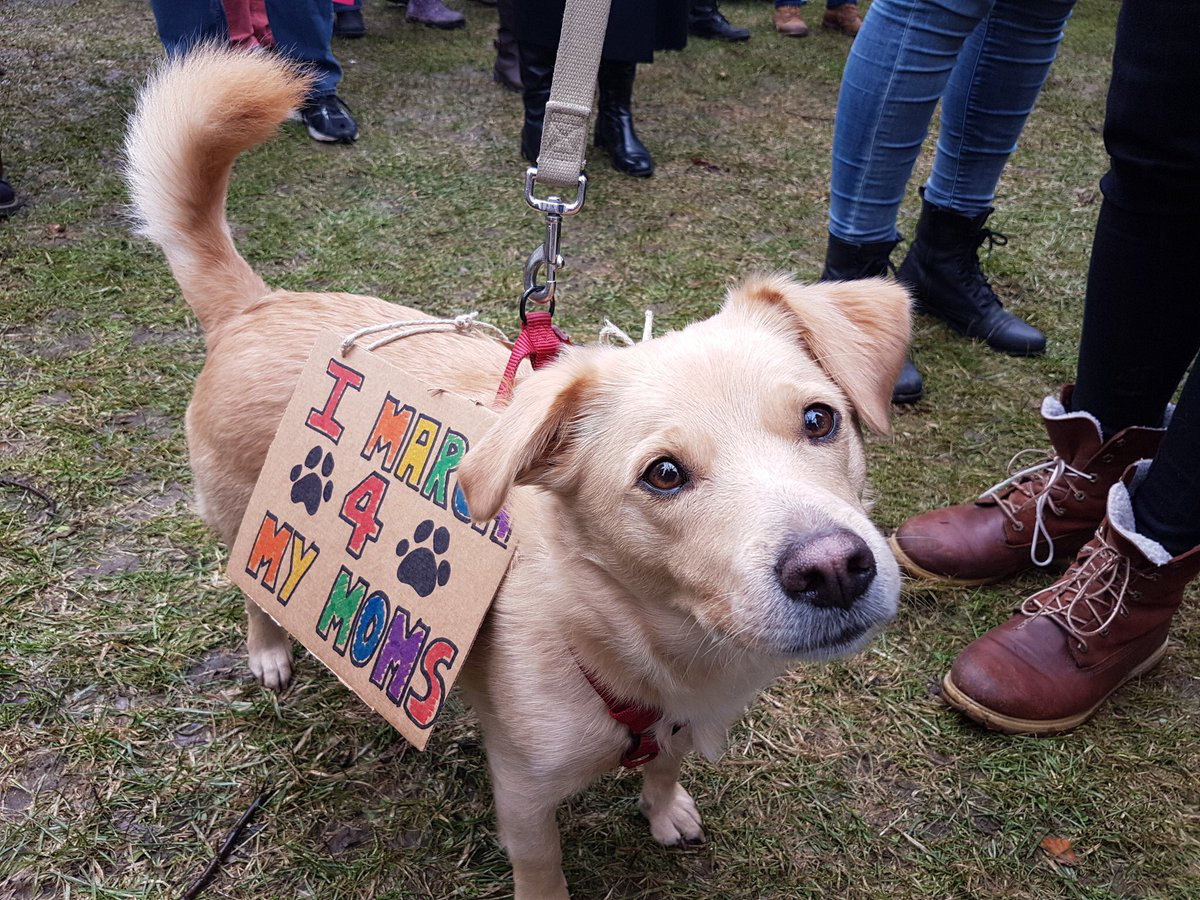

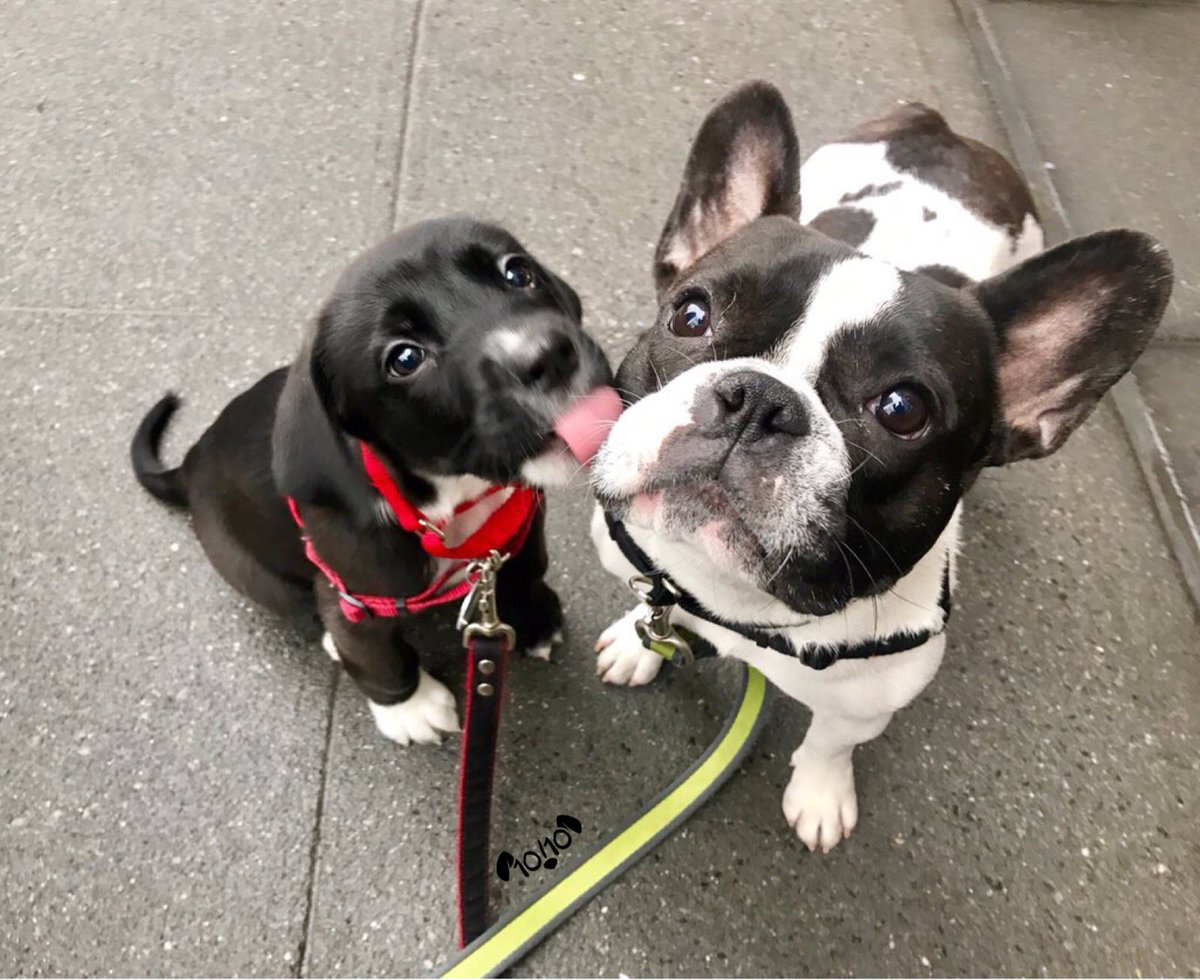

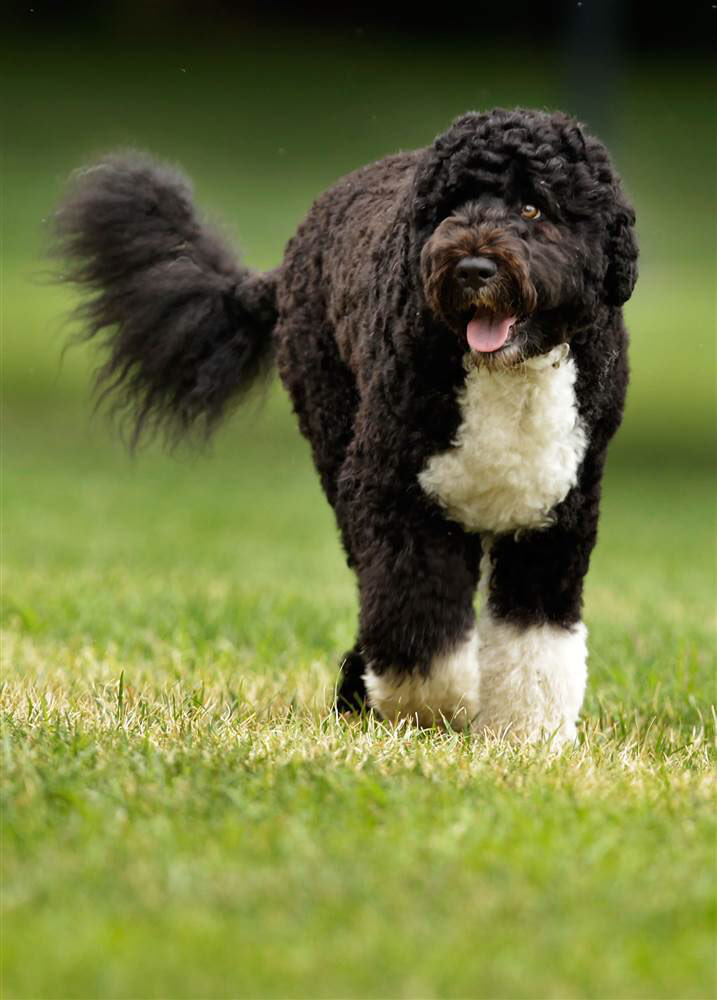

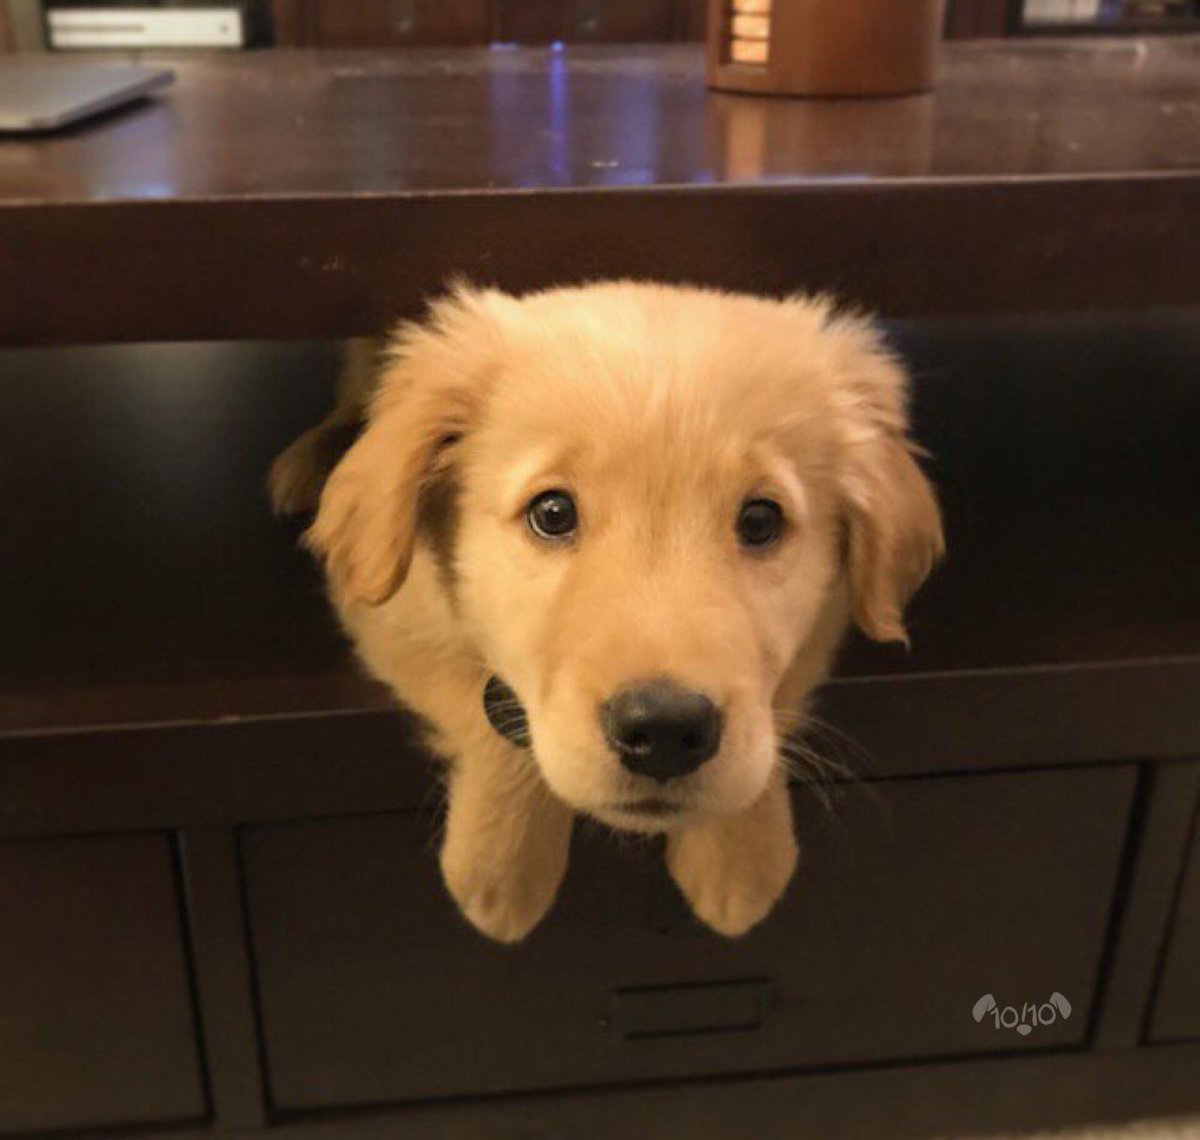

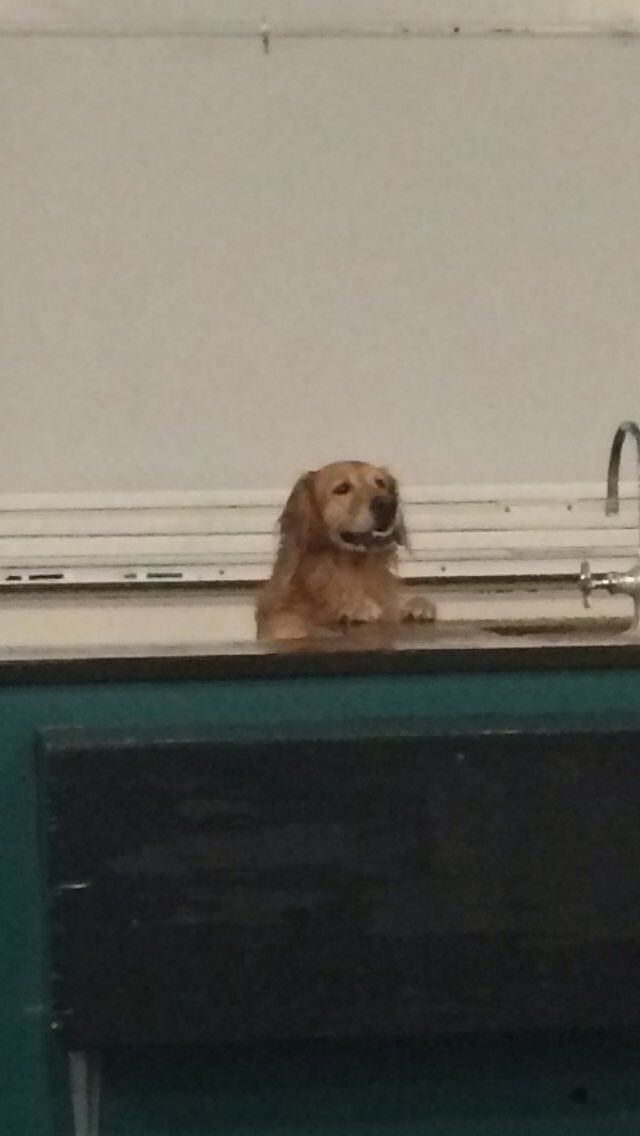

In [87]:
from PIL import Image
import io
for a in range(0,5):
    m=print_image(url[a])
    display(m)

### Insight 2:
### How many retweets for every Image in above?

In [88]:
retweets_count=pd.DataFrame({'Images':['First Image','Second Image','Third Image','Fourth Image','Fifth Image'],
                            'Favorites ':[li[0], li[5], li[6], li[7], li[8]]})



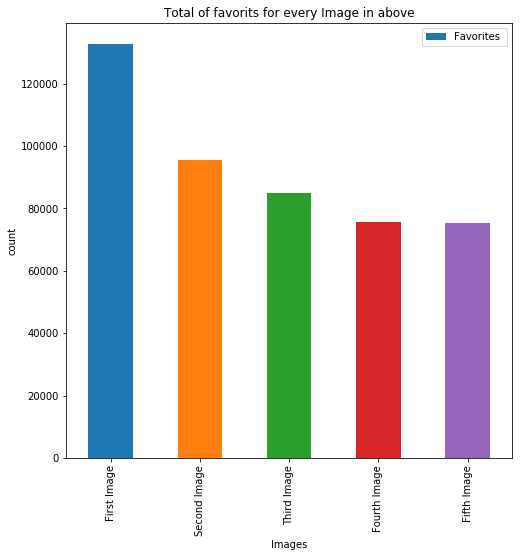

In [89]:
retweets_count.plot.bar(x='Images',y='Favorites ', figsize=(8,8));
plt.title('Total of favorits for every Image in above');
plt.xlabel("Images")
plt.ylabel("count")
plt.legend()
plt.show();

From this bar chart I notice the first image has around of 130000, the second image has around of 99000 favorites, the third image has 81000 favorites, and the fourth image with fifth image have around 79000 favorites.

### Insight 3:


From where the users log into Tweeter?

The most of users are using Twitter for iPhone

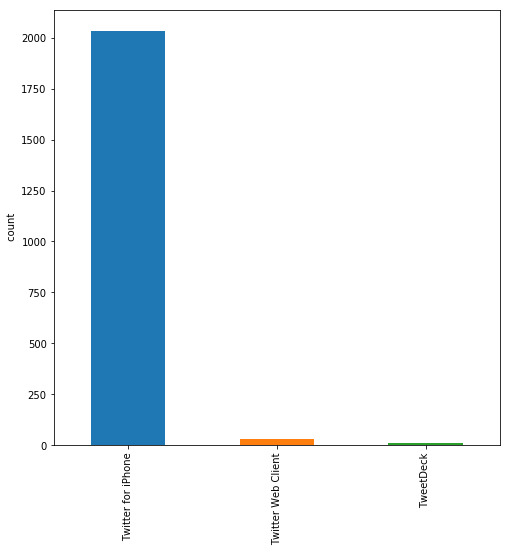

In [90]:
ax=master.source.value_counts().plot(kind='bar',figsize=(8,8))
ax.set_ylabel(" count");
